In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from ast import literal_eval
import statsmodels.formula.api as smf
import datetime
from statistics import mean
import scipy

import warnings
warnings.filterwarnings("ignore")
#eng = spacy.load('en_core_web_lg')

In [2]:
# load full dataset
df = pd.read_csv('gun_rights_people.csv', sep=';', encoding='utf-8', converters={'people': literal_eval})

In [12]:
# convert dates
df['datetime'] =  pd.to_datetime(df['publish_date'], dayfirst=True, errors='coerce')

# convert to date
df['date'] = df['datetime'].dt.date
# df['year'] = df['datetime'].dt.strftime('%Y')

# drop all outside daterange
start = datetime.datetime.strptime('2012-01-11', "%Y-%m-%d").date()
end = datetime.datetime.strptime('2019-12-31', "%Y-%m-%d").date()
drange = (df['date'] >= start) & (df['date'] <= end)
df = df.loc[drange]

In [4]:
# load annotated people
annotated_people = pd.read_csv('annotated_persons.csv', sep=';', encoding='utf-8')

In [15]:
# load shootings and get list of perpetrators and victims
shootings = pd.read_csv('shootings_victims_perpetrators.csv', sep=';', parse_dates=['date'])

perpetrators = []
for p in shootings.perpetrators:
    perpetrators.append(p)

victims = []
for row in shootings[shootings.victims.isnull() == False].victims:
    for v in row.split(", "):
        victims.append(v)

In [6]:
# append victims and perpetrators to annotated_people
v = {'person': [x.lower() for x in victims], 'victim': [1] * len(victims)}
p = {'person': [x.lower() for x in perpetrators], 'perpetrator': [1] * len(perpetrators)}

annotated_people = annotated_people.append(pd.DataFrame(v), ignore_index=True)
annotated_people = annotated_people.append(pd.DataFrame(p), ignore_index=True)

In [23]:
# Group Assignment
def GroupAssignment(df):
    # variables to count how many people were mentioned at least once
    df['gun_rights_mentioned'] = 0
    df['gun_control_mentioned'] = 0
    df['gun_neutral_mentioned'] = 0
    df['victim_mentioned'] = 0
    df['perpetrator_mentioned'] = 0
    df['activist_mentioned'] = 0
    df['artist_tv_mentioned'] = 0
    df['politician_mentioned'] = 0
    df['other_mentioned'] = 0

    # variables to count how many people were mentioned in total
    df['gun_rights_total'] = 0
    df['gun_control_total'] = 0
    df['gun_neutral_total'] = 0
    df['victim_total'] = 0
    df['perpetrator_total'] = 0
    df['activist_total'] = 0
    df['artist_tv_total'] = 0
    df['politician_total'] = 0
    df['other_total'] = 0

    for i, row in enumerate(df.people):
        for person in row.keys():
            # print(person + ' is a')
            for j, person2 in enumerate(annotated_people.person):
                if (person.lower() == person2):

                    # MENTIONED
                    if annotated_people.politician.iloc[j] == 1:
                        df.politician_mentioned.iloc[i] += 1
                    if annotated_people.tv_artist.iloc[j] == 1:
                        df.artist_tv_mentioned.iloc[i] += 1
                    if annotated_people.activist.iloc[j] == 1:
                        df.activist_mentioned.iloc[i] += 1
                    if annotated_people.perpetrator.iloc[j] == 1:
                        df.perpetrator_mentioned.iloc[i] += 1
                    if annotated_people.victim.iloc[j] == 1:
                        df.victim_mentioned.iloc[i] += 1
                    if annotated_people.other.iloc[j] != None:
                        df.other_mentioned.iloc[i] += 1


                    # TOTAL
                    if annotated_people.politician.iloc[j] == 1:
                        df.politician_total.iloc[i] += row.get(person)
                    if annotated_people.tv_artist.iloc[j] == 1:
                        df.artist_tv_total.iloc[i] += row.get(person)
                    if annotated_people.activist.iloc[j] == 1:
                        df.activist_total.iloc[i] += row.get(person)
                    if annotated_people.perpetrator.iloc[j] == 1:
                        df.perpetrator_total.iloc[i] += row.get(person)
                    if annotated_people.victim.iloc[j] == 1:
                        df.victim_total.iloc[i] += row.get(person)
                    if annotated_people.other.iloc[j] != None:
                        df.other_total.iloc[i] += row.get(person)


                    # OPINION ON GUN RIGHTS/CONTROL MENTIONED
                    if annotated_people.guns.iloc[j] == 'pro':
                        df.gun_rights_mentioned.iloc[i] += 1
                    if annotated_people.guns.iloc[j] == 'neutral':
                        df.gun_neutral_mentioned.iloc[i] += 1
                    if annotated_people.guns.iloc[j] == 'contra':
                        df.gun_control_mentioned.iloc[i] += 1

                    # OPINION ON GUN RIGHTS/CONTROL TOTAL
                    if annotated_people.guns.iloc[j] == 'pro':
                        df.gun_rights_total.iloc[i] += row.get(person)
                    if annotated_people.guns.iloc[j] == 'neutral':
                        df.gun_neutral_total.iloc[i] += row.get(person)
                    if annotated_people.guns.iloc[j] == 'contra':
                        df.gun_control_total.iloc[i] += row.get(person)
    
    return df

In [28]:
for i in range(100):
    print('Processing chunk ' + str(i+1))
    path = 'Data/Chunks/gun_rights_people_'+str(i)+'.csv'
    df = pd.read_csv(path, sep=';', encoding='utf-8', converters={'people': literal_eval})
    df = GroupAssignment(df)
    if i == 0:
        df_all = df
    else:
        df_all = df_all.append(df)

Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Processing chunk 25
Processing chunk 26
Processing chunk 27
Processing chunk 28
Processing chunk 29
Processing chunk 30
Processing chunk 31
Processing chunk 32
Processing chunk 33
Processing chunk 34
Processing chunk 35
Processing chunk 36
Processing chunk 37
Processing chunk 38
Processing chunk 39
Processing chunk 40
Processing chunk 41
Processing chunk 42
Processing chunk 43
Processing chunk 44
Processing chunk 45
Processing chunk 46
Processing chunk 47
Processing chunk 48
Processing chunk 49
Processing chunk 50
Processin

## Descriptives

In [3]:
# make count variables relative
df['gun_rights_mentioned_relative'] = df['gun_rights_mentioned'] / (df['gun_rights_mentioned'] + df['gun_control_mentioned'])
df['gun_control_mentioned_relative'] = df['gun_control_mentioned'] / (df['gun_rights_mentioned'] + df['gun_control_mentioned'])
df['gun_rights_total_relative'] = df['gun_rights_total'] / (df['gun_rights_total'] + df['gun_control_total'])
df['gun_control_total_relative'] = df['gun_control_total'] / (df['gun_rights_total'] + df['gun_control_total'])

In [4]:
# remove FORBES
df = df[df.media_name != 'Forbes']

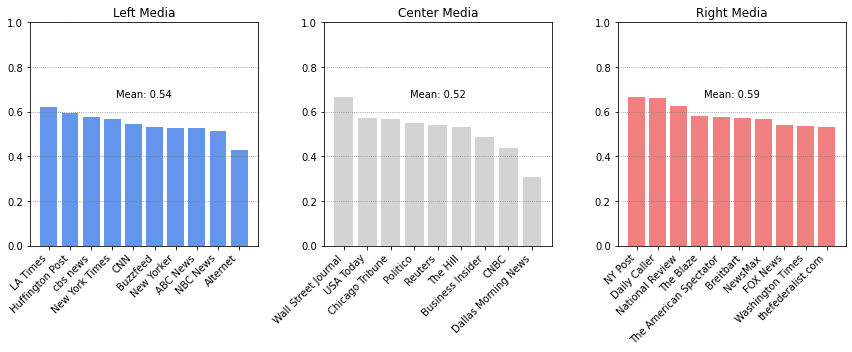

In [13]:
# relative gun control per medium
mode = 'mentioned'

left_media = df[df.mix_rating == 'left'].groupby('media_name')[['gun_control_'+mode+'_relative', 'mix_rating']].agg({'gun_control_'+mode+'_relative': 'mean', 'mix_rating': 'count'}).sort_values('gun_control_'+mode+'_relative', ascending=False)
center_media = df[df.mix_rating == 'center'].groupby('media_name')[['gun_control_'+mode+'_relative', 'mix_rating']].agg({'gun_control_'+mode+'_relative': 'mean', 'mix_rating': 'count'}).sort_values('gun_control_'+mode+'_relative', ascending=False)
right_media = df[df.mix_rating == 'right'].groupby('media_name')[['gun_control_'+mode+'_relative', 'mix_rating']].agg({'gun_control_'+mode+'_relative': 'mean', 'mix_rating': 'count'}).sort_values('gun_control_'+mode+'_relative', ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
colors=['cornflowerblue', 'lightgrey', 'lightcoral']


ax[0].bar(left_media.index, left_media['gun_control_'+mode+'_relative'], color=colors[0])
ax[0].set_xticklabels(left_media.index, rotation=45, ha='right')
ax[0].set_ylim([0,1])
ax[0].grid(b=True, axis='y', which='major', color='grey', linestyle='dotted')
ax[0].set_title('Left Media')
left_mean = 'Mean: ' + str(round(mean(left_media['gun_control_'+mode+'_relative']),2))
ax[0].text(0.5, 0.68, left_mean, horizontalalignment='center',
           verticalalignment='center', transform=ax[0].transAxes)

ax[1].bar(center_media.index, center_media['gun_control_'+mode+'_relative'], color=colors[1])
ax[1].set_xticklabels(center_media.index, rotation=45, ha='right')
ax[1].set_ylim([0,1])
ax[1].grid(b=True, axis='y', which='major', color='grey', linestyle='dotted')
ax[1].set_title('Center Media')
center_mean = 'Mean: ' + str(round(mean(center_media['gun_control_'+mode+'_relative']),2))
ax[1].text(0.5, 0.68, center_mean, horizontalalignment='center',
           verticalalignment='center', transform=ax[1].transAxes)

ax[2].bar(right_media.index, right_media['gun_control_'+mode+'_relative'], color=colors[2])
ax[2].set_xticklabels(right_media.index, rotation=45, ha='right')
ax[2].set_ylim([0,1])
ax[2].grid(b=True, axis='y', which='major', color='grey', linestyle='dotted')
ax[2].set_title('Right Media')
right_mean = 'Mean: ' + str(round(mean(right_media['gun_control_'+mode+'_relative']),2))
ax[2].text(0.5, 0.68, right_mean, horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)

fig.tight_layout()
fig.savefig('Graphs/gun_control_media.png')

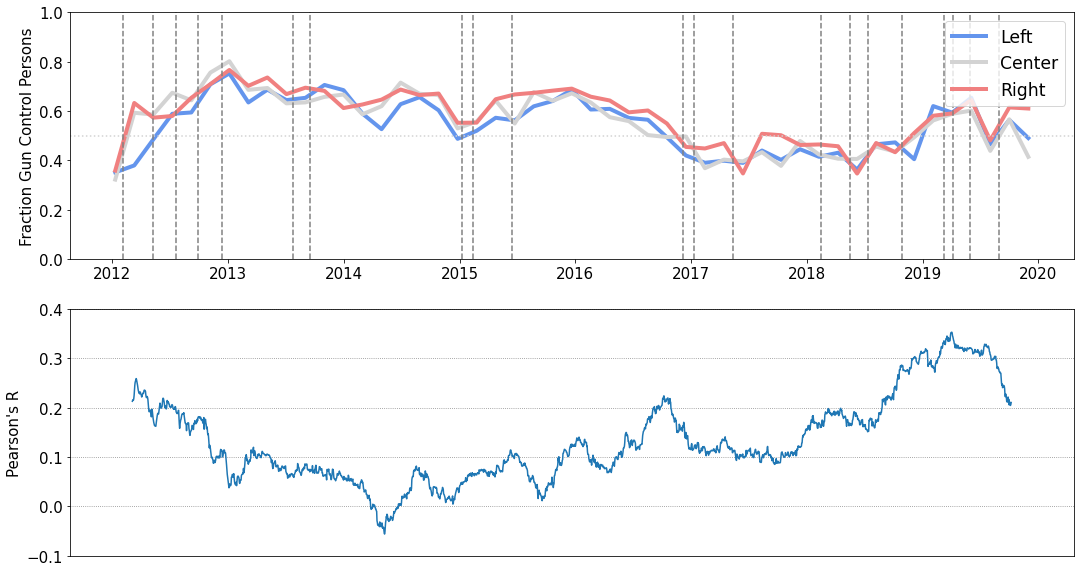

In [21]:
# VISUALIZATION OF PROPORTIONS I
mode = 'mentioned'

# PER DAY
gun_control_left_perday = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'left')].groupby(pd.Grouper(key='datetime', freq='1d'))['gun_control_'+mode+'_relative'].mean().interpolate()

gun_control_center_perday = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'center')].groupby(pd.Grouper(key='datetime', freq='1d'))['gun_control_'+mode+'_relative'].mean().interpolate()

gun_control_right_perday = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'right')].groupby(pd.Grouper(key='datetime', freq='1d'))['gun_control_'+mode+'_relative'].mean().interpolate()

# PER 60 DAYS
gun_control_left = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'left')].groupby(pd.Grouper(key='datetime', freq='60d'))['gun_control_'+mode+'_relative'].mean()

gun_control_center = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'center')].groupby(pd.Grouper(key='datetime', freq='60d'))['gun_control_'+mode+'_relative'].mean()

gun_control_right = df[(df['datetime'].isnull() == False) & 
                       (df.mix_rating == 'right')].groupby(pd.Grouper(key='datetime', freq='60d'))['gun_control_'+mode+'_relative'].mean()


# plot publications per day
fig, ax = plt.subplots(2,figsize=(18, 10),gridspec_kw={'height_ratios': [1, 1]}
                      )

ax[0].plot(gun_control_left.index,  gun_control_left, color='cornflowerblue', label='Left', linewidth=4)
ax[0].plot(gun_control_center.index,  gun_control_center, color='lightgrey', label='Center', linewidth=4)
ax[0].plot(gun_control_right.index,  gun_control_right, color='lightcoral', label='Right', linewidth=4)
ax[0].legend(loc='upper right', fontsize='xx-large')
ax[0].set_ylim([0,1])
ax[0].tick_params(axis='x', which='major', labelsize=15)
ax[0].tick_params(axis='y', which='major', labelsize=15)

lc = str(round(scipy.stats.pearsonr(gun_control_left_perday, gun_control_center_perday)[0],3))
rc = str(round(scipy.stats.pearsonr(gun_control_right_perday, gun_control_center_perday)[0],3))
lr = str(round(scipy.stats.pearsonr(gun_control_left_perday, gun_control_right_perday)[0],3))

string = "Pearson's R Daily Mean:\nLeft - Center: "+lc+'\nRight - Center: '+rc+'\nLeft - Right: '+lr

#ax[0].text(0.20, 0.39, string, transform=ax[0].transAxes, fontsize=19,
#        verticalalignment='top')

ax[0].axhline(y=0.5, c='lightgrey', linestyle='dotted')
ax[0].set_ylabel("Fraction Gun Control Persons", fontsize=15)

for event in shootings['date']:
    ax[0].axvline(x=event, c='grey', linestyle='--')


# Compute rolling window synchrony
rolling_r = gun_control_left_perday.rolling(window=365, center=True).corr(gun_control_right_perday)
# f,ax=plt.subplots(1,1,figsize=(14,2),sharex=True)
rolling_r.plot(ax=ax[1])
ax[1].set_ylim([-0.1,0.4])
ax[1].set_ylabel("Pearson's R", fontsize=15)
ax[1].get_xaxis().set_visible(False)
ax[1].tick_params(axis='y', which='major', labelsize=15)
ax[1].grid(b=True, axis='y', which='major', color='grey', linestyle='dotted')



plt.show()

fig.tight_layout()
fig.savefig('Graphs/gun_control_relative_overtime.png')

## Regression

In [270]:
# load full shootings list
shootings = pd.read_csv('Data/motherjones_shootings.csv', encoding='latin-1', sep=';', parse_dates=['date'])
shootings = shootings[shootings.date.isnull() == False]
shootings['date'] = shootings['date'].dt.date
shootings = shootings[shootings.fatalities > 7]

def SchoolShooting(location):
    if location == 'School':
        return 1
    else:
        return 0
    
shootings['school'] = shootings['location.1'].apply(lambda x: SchoolShooting(x))

In [389]:
# add independent variables
df['days_since_last_shooting'] = None
df['last_victims'] = None
df['last_location'] = None
df['last_school'] = None

for i, date in enumerate(df.date):
    last_shootings = [10000]
    for j, date2 in enumerate(shootings.date):
        days_diff = int((date-date2).days)
        if (days_diff >= 0) and (days_diff < min(last_shootings)):    
            days_ago = int((date-date2).days)
            last_shootings.append(days_ago)

            df.last_victims.iloc[i] = shootings.fatalities.iloc[j]
            df.last_location.iloc[i] = shootings['location.1'].iloc[j]
            df.last_school.iloc[i] = shootings.school.iloc[j]

    try:
        df.days_since_last_shooting.iloc[i] = min(last_shootings)
    except Exception as e:
        print('no shooting mate')

df = df[df.days_since_last_shooting != 10000]

In [403]:
# print regression
def RegressionPrinter(df):
    
    # df = df[(df.gun_control_mentioned > 0) | (df.gun_rights_mentioned > 0)]
    df = df[df.days_since_last_shooting.isnull() == False]
    df = df[df.last_victims.isnull() == False]
    df.days_since_last_shooting = df.days_since_last_shooting.astype(str).astype(int)
    df.last_victims = df.last_victims.astype(int)
    
    model = smf.ols(formula='gun_control_total_relative ~ mix_rating + days_since_last_shooting + last_victims + last_school', data=df)
     
    res = model.fit()
    print(res.summary())
    return res

RegressionPrinter(df);

                                OLS Regression Results                                
Dep. Variable:     gun_control_total_relative   R-squared:                       0.001
Model:                                    OLS   Adj. R-squared:                  0.001
Method:                         Least Squares   F-statistic:                     8.178
Date:                        Mon, 13 Jul 2020   Prob (F-statistic):           9.99e-08
Time:                                16:09:48   Log-Likelihood:                -15279.
No. Observations:                       33315   AIC:                         3.057e+04
Df Residuals:                           33309   BIC:                         3.062e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

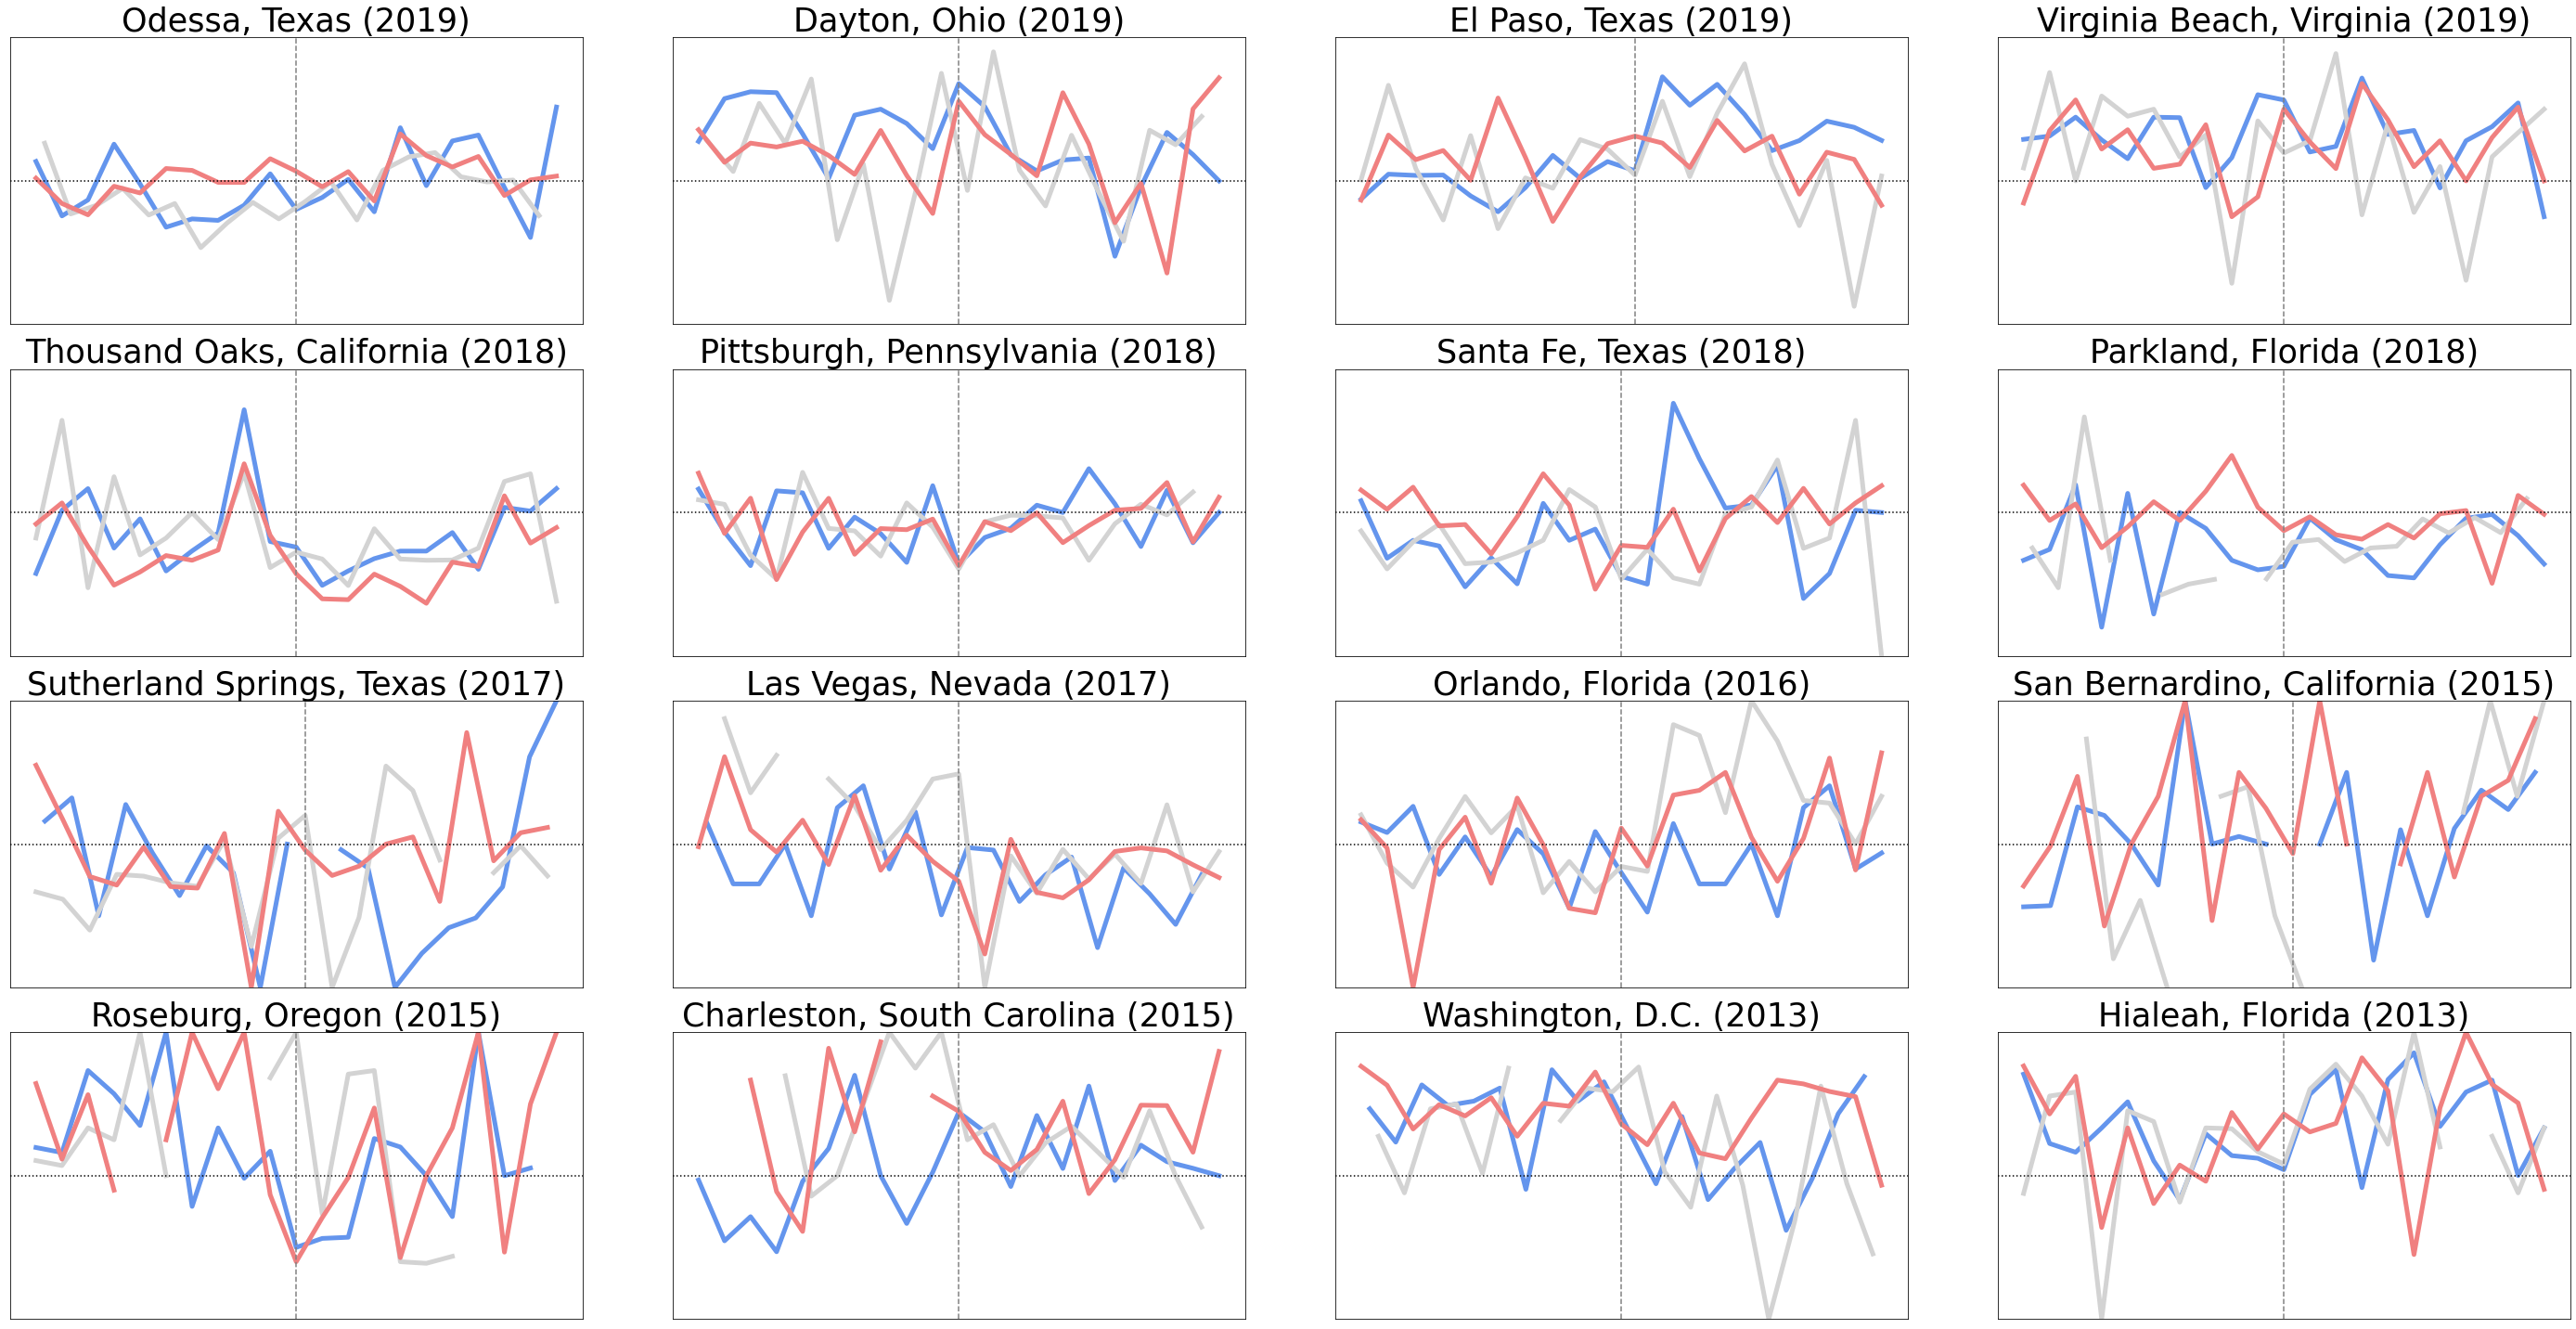

In [472]:
# graph after shootings
mode = 'mentioned'

fig = plt.figure(figsize=(40,20))

for i, date in enumerate(shootings.date):
    if (shootings.fatalities.iloc[i] >= 7) & (i<=15):
        start = (date - pd.DateOffset(30)).date()
        end = (date + pd.DateOffset(30)).date()
        drange = (df['date'] >= start) & (df['date'] <= end)
        df1 = df.loc[drange]

        #if i == 0:
        #    df_after_shootings = df1
        #else:
        #    df_after_shootings = df_after_shootings.append(df1)


        df1_left = df1[(df1['datetime'].isnull() == False) & (df.mix_rating == 'left') &
                      ((df1.gun_control_mentioned > 0) | (df1.gun_rights_mentioned > 0))].groupby(pd.Grouper(key='datetime', freq='3d'))['gun_control_'+mode+'_relative'].mean()
        df1_center = df1[(df1['datetime'].isnull() == False) & (df.mix_rating == 'center') &
                      ((df1.gun_control_mentioned > 0) | (df1.gun_rights_mentioned > 0))].groupby(pd.Grouper(key='datetime', freq='3d'))['gun_control_'+mode+'_relative'].mean()
        df1_right = df1[(df1['datetime'].isnull() == False) & (df.mix_rating == 'right') &
                      ((df1.gun_control_mentioned > 0) | (df1.gun_rights_mentioned > 0))].groupby(pd.Grouper(key='datetime', freq='3d'))['gun_control_'+mode+'_relative'].mean()


        ax = fig.add_subplot(4,4,i+1)
        ax.plot(df1_left.index, df1_left, color='cornflowerblue', linewidth=5)
        ax.plot(df1_center.index, df1_center, color='lightgrey', linewidth=5)
        ax.plot(df1_right.index, df1_right, color='lightcoral', linewidth=5)
        title = shootings.location.iloc[i]+' ('+str(int(shootings.year.iloc[i]))+')'
        ax.set_title(title, fontsize=35)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.axhline(y=0.5, c='black', linestyle='dotted')
        ax.set_ylim([0,1])
        ax.axvline(x=date, c='grey', linestyle='--')


plt.tight_layout()
plt.show()
fig.savefig('Graphs/after_shootings_plot.svg')